# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide
1. Importa los datos 'df_furniture.csv'
2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas
3. ¿De qué fecha a qué fecha va el histórico?
4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?
5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?
6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?
7. Estaría bien visualizar todos los componentes de la serie temporal por separado
8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional
9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?
10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?
11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cargamos los datos

In [45]:
df = pd.read_csv(r"C:\Users\suert\OneDrive\Documentos\GitHub\Machine_Learning\3-Time_Series\ejercicios\data\df_furniture.csv")
df

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
...,...,...
326,2019-03-01,9718.107698
327,2019-04-01,9248.814254
328,2019-05-01,10001.305304
329,2019-06-01,9431.337229


## 2. Tratar la fecha como texto y parsear

In [61]:
df['Month'] = df['Month'].astype(str)

# Crear columnas para día, mes y año
df['Dia'] = df['Month'].str[5:7].astype(str)
df['Mes'] = df['Month'].str[-2:].astype(str)
df['Año'] = df['Month'].str[:4].astype(str)


In [62]:
df.head()

,Month,furniture_price_adjusted,Dia,Mes,Año
0,1992-01-01,2073.432724,01,01,1992
1,1992-02-01,2114.485812,02,01,1992
2,1992-03-01,2260.570891,03,01,1992
3,1992-04-01,2255.103236,04,01,1992
4,1992-05-01,2331.414618,05,01,1992


In [70]:
df['Valor']= df['furniture_price_adjusted']

In [67]:
df['Fecha'] = pd.to_datetime(df['Month'])


## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

In [68]:
fecha_inicio = df['Fecha'].min()
fecha_fin = df['Fecha'].max()

print('El histórico va desde', fecha_inicio, 'hasta', fecha_fin)

El histórico va desde 1992-01-01 00:00:00 hasta 2019-07-01 00:00:00


## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en als acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

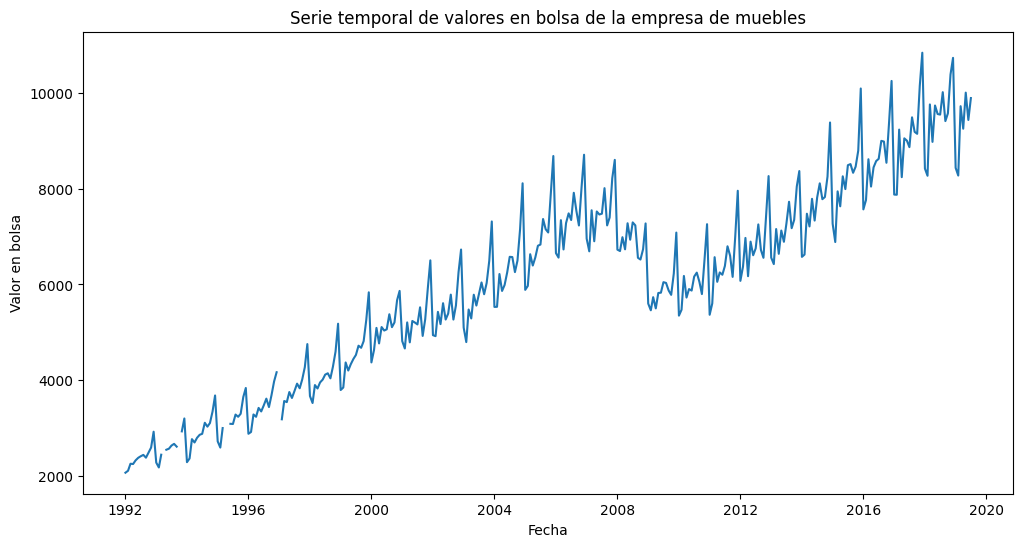

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Valor'])
plt.xlabel('Fecha')
plt.ylabel('Valor en bolsa')
plt.title('Serie temporal de valores en bolsa de la empresa de muebles')
plt.show()


## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [74]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Valor'])
p_value = result[1]

if p_value < 0.05:
    print('La serie NO es estacionaria (p-value =', p_value, ')')
else:
    print('La serie es estacionaria (p-value =', p_value, ')')

La serie es estacionaria (p-value = 0.7035529748089993 )


<Figure size 1200x600 with 0 Axes>

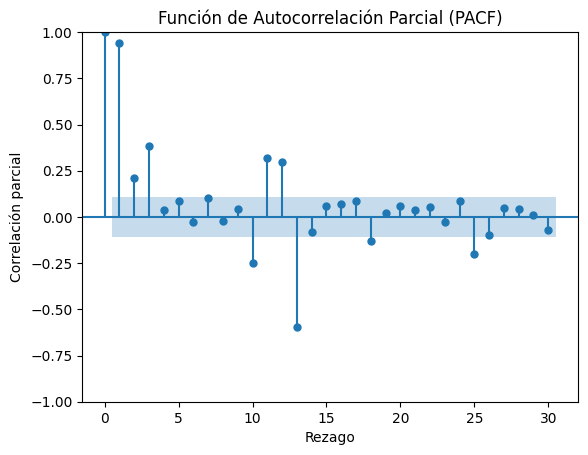

In [75]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df['Valor'], lags=30)
plt.xlabel('Rezago')
plt.ylabel('Correlación parcial')
plt.title('Función de Autocorrelación Parcial (PACF)')
plt.show()


## 6. ¿Conoces algún método para representar mejor la tendencia?

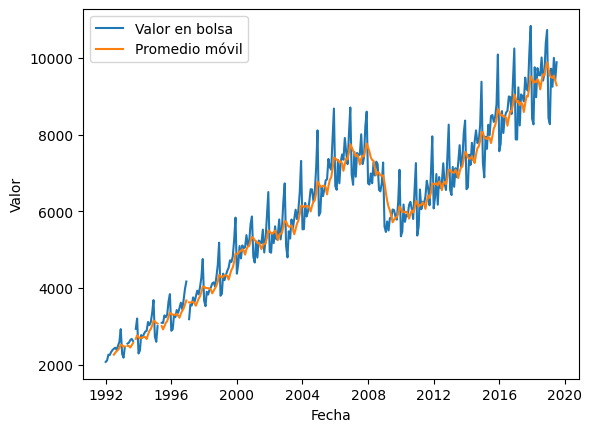

In [76]:
import matplotlib.pyplot as plt

# Aplicar promedio móvil con ventana de tamaño 7 (por ejemplo)
df['PromedioMovil'] = df['Valor'].rolling(window=7).mean()

# Graficar la serie original y el promedio móvil
plt.plot(df['Fecha'], df['Valor'], label='Valor en bolsa')
plt.plot(df['Fecha'], df['PromedioMovil'], label='Promedio móvil')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.show()


## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

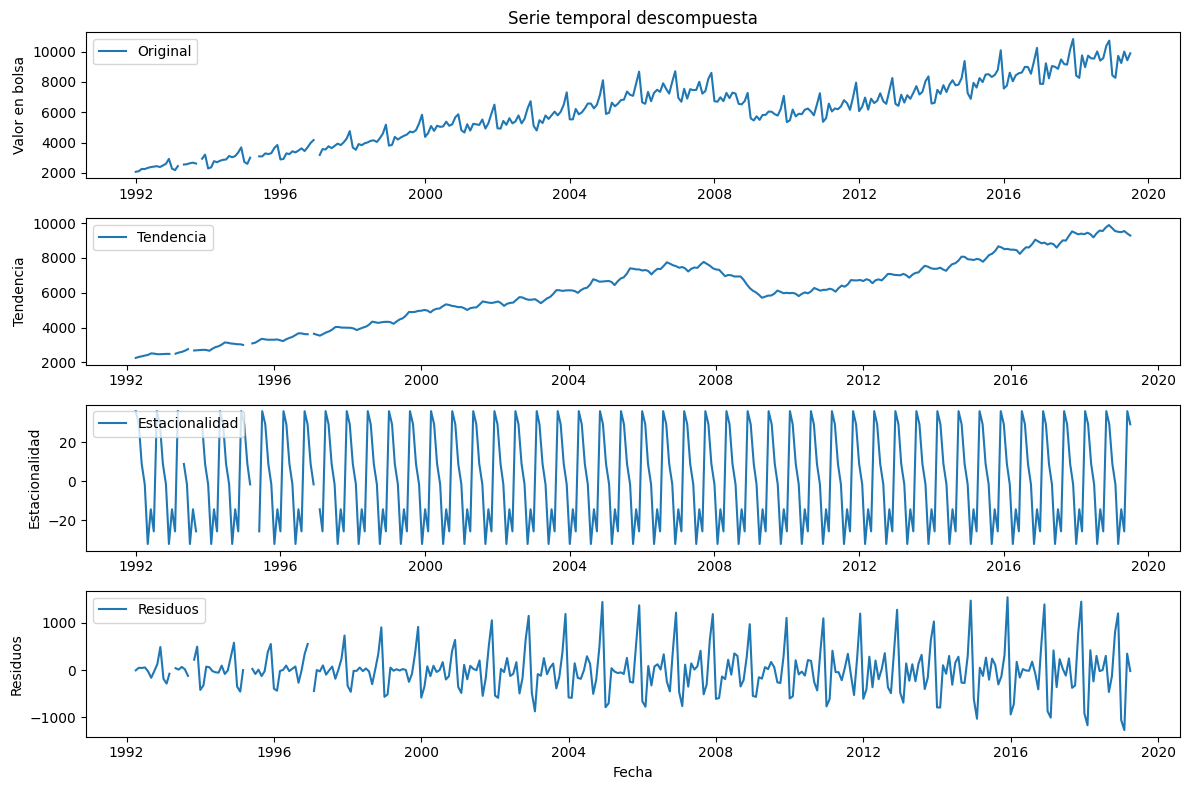

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Valor'], model='additive',period=7)

trend = result.trend
seasonality = result.seasonal
residuals = result.resid

plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Fecha'], df['Valor'], label='Original')
plt.legend()
plt.ylabel('Valor en bolsa')
plt.title('Serie temporal descompuesta')

plt.subplot(412)
plt.plot(df['Fecha'], trend, label='Tendencia')
plt.legend()
plt.ylabel('Tendencia')

plt.subplot(413)
plt.plot(df['Fecha'], seasonality, label='Estacionalidad')
plt.legend()
plt.ylabel('Estacionalidad')

plt.subplot(414)
plt.plot(df['Fecha'], residuals, label='Residuos')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Residuos')

plt.tight_layout()
plt.show()


## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

<Figure size 1200x600 with 0 Axes>

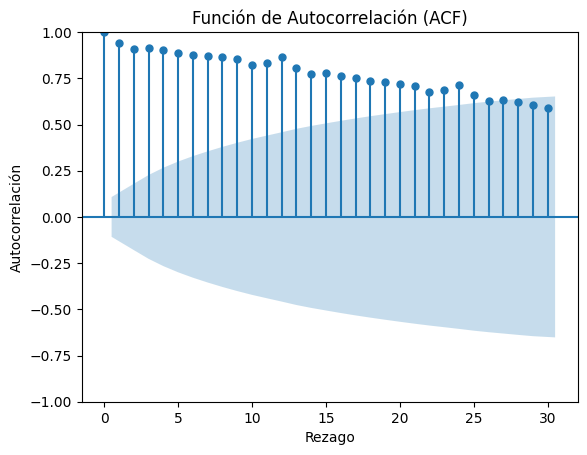

In [85]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df['Valor'], lags=30)
plt.xlabel('Rezago')
plt.ylabel('Autocorrelación')
plt.title('Función de Autocorrelación (ACF)')
plt.show()

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

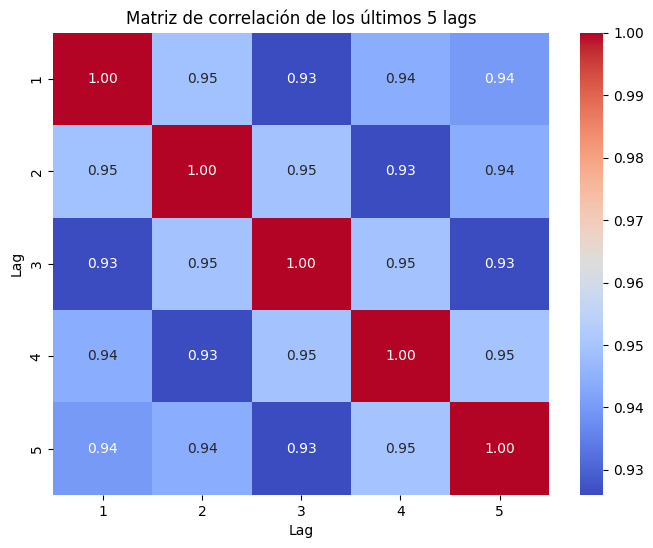

In [86]:
import numpy as np

lags = 5
lagged_data = np.zeros((len(df['Valor']), lags))

for i in range(lags):
    lagged_data[:, i] = df['Valor'].shift(i+1)

lagged_data = lagged_data[lags:]  # Eliminar filas con valores nulos debido a los rezagos

correlation_matrix = np.corrcoef(lagged_data, rowvar=False)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación de los últimos 5 lags')
plt.xlabel('Lag')
plt.ylabel('Lag')
plt.xticks(np.arange(5) + 0.5, np.arange(1, 6))
plt.yticks(np.arange(5) + 0.5, np.arange(1, 6))
plt.show()


## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Valor'], model='additive',period=5)
seasonality = result.seasonal

# Encontrar la frecuencia de la estacionalidad
frecuencia_estacionalidad = seasonality.idxmax() - seasonality.idxmin()


In [95]:
frecuencia_estacionalidad

-2

Si la frecuencia es -2, significa que se cumple un patrón estacional cada 2 días, pero en sentido inverso. En otras palabras, la serie temporal muestra una estacionalidad con un ciclo de 2 días, pero con una fase opuesta en comparación con el patrón dominante.

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

Primer aplicando la diferenciación

In [96]:
# Diferenciación de primer orden
df['Valor_diferenciado'] = df['Valor'].diff()



Despues aplicando la descomposición

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Valor'], model='additive',period = 5)
trend = result.trend

# Restar la tendencia de la serie original
df['Valor_sin_tendencia'] = df['Valor'] - trend
